In [18]:
import pandas as pd
from utils import *
from plotting import *

In [19]:
entropy_scores = pd.read_csv("../data/output_matching/entropy/entropy_tol_5ppm.tsv", sep="\t")
entropy_scores = append_classes(entropy_scores, "query")

In [20]:
larger_superclasses = entropy_scores.groupby("superclass").filter(lambda x: len(x) > 2)

/m2b/home/hechth/git/recetox/ei_spectra_predictions/analysis/Python_scripts/plotting.py:267: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels, rotation=45, ha=ha)


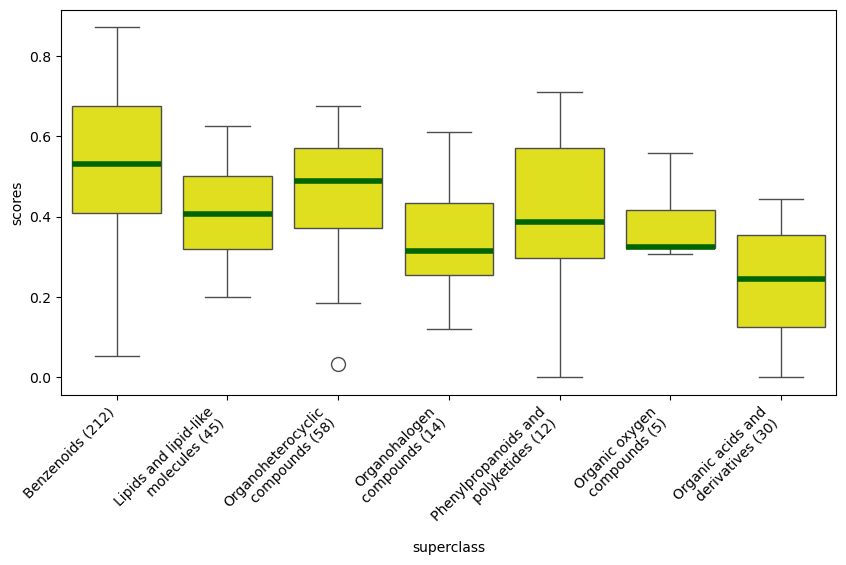

In [22]:
order = [
    "Benzenoids",
    "Lipids and lipid-like molecules",
    "Organoheterocyclic compounds",
    "Organohalogen compounds",
    "Phenylpropanoids and polyketides",
    "Organic oxygen compounds",
    "Organic acids and derivatives"
]

plot_width = calc_plot_width(entropy_scores, "superclass", 1)
fig = plt.figure(figsize=(plot_width, 5))
ax = sns.boxplot(
    x="superclass",
    y='scores',
    data=larger_superclasses,
    order = order,
    color="yellow",
    medianprops={'color': "darkgreen", 'linewidth': 4.0},
    flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'none'})

count_data = entropy_scores["superclass"].value_counts() * 2

# # Add the count labels to the x-axis
make_xticklabels(22, ax, count_data)